## crime_data

## hierarchical_clustering 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering


In [2]:
df=pd.read_csv("D:\\assignment\\clustering\\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.rename(columns={'Unnamed: 0':'state'}, inplace=True )
df.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
 #Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [5]:
df_norm=norm_func(df.iloc[:,1:])

In [6]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


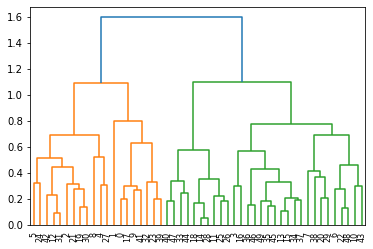

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [8]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [9]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [10]:
y_hc=hc.fit_predict(df_norm)

In [11]:
y_hc

array([3, 4, 1, 5, 1, 1, 0, 0, 1, 3, 0, 2, 1, 5, 2, 5, 5, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 5, 5, 5, 5, 0, 3, 2, 3, 1, 0,
       2, 5, 5, 2, 0, 5], dtype=int64)

In [12]:
df['h_clusterid']=y_hc

In [13]:
df

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [14]:
df1=df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]]
df1

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
38,Rhode Island,3.4,174,87,8.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
48,Wisconsin,2.6,53,66,10.8,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
43,Utah,3.2,120,80,22.9,0
10,Hawaii,5.3,46,83,20.2,0
22,Minnesota,2.7,72,66,14.9,0
21,Michigan,12.1,255,74,35.1,1


In [15]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

C:\Users\rajpu\AppData\Local\Temp\ipykernel_7320\2660138374.py:1: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.244444,124.555556,78.333333,15.455556
1,1,10.883333,256.916667,78.333333,32.250000
2,2,3.180000,78.700000,49.300000,11.630000
3,3,14.671429,251.285714,54.285714,21.685714
4,4,10.000000,263.000000,48.000000,44.500000
5,5,6.918182,138.636364,64.636364,20.263636


In [16]:
df[df['h_clusterid']==0]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0
29,New Jersey,7.4,159,89,18.8,0
38,Rhode Island,3.4,174,87,8.3,0
43,Utah,3.2,120,80,22.9,0
48,Wisconsin,2.6,53,66,10.8,0


## K-MEANS_Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
df_k=pd.read_csv("D:\\assignment\\clustering\\crime_data.csv")
df_k.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
df_k.rename(columns={'Unnamed: 0':'state'}, inplace=True )
df_k.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
# use standralisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_k = scaler.fit_transform(df_k.iloc[:,1:])

In [21]:
scaled_df_k

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [22]:
kmeans = KMeans(n_clusters=6,random_state=42)
predict=kmeans.fit_predict(scaled_df_k)

In [23]:
predict

array([4, 0, 2, 1, 2, 2, 5, 1, 2, 4, 5, 3, 2, 1, 3, 1, 1, 4, 3, 2, 5, 2,
       3, 4, 2, 1, 1, 2, 3, 5, 2, 2, 4, 3, 5, 1, 1, 5, 5, 4, 3, 4, 2, 5,
       3, 1, 5, 3, 3, 1])

C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


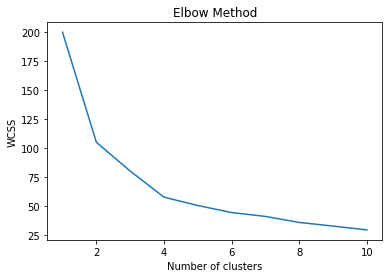

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
#Building Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df_k)

KMeans(n_clusters=4, random_state=42)

In [26]:
# within cluster sum of squares
wcss


[199.99999999999997,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.33327385184907,
 44.259807638112314,
 40.912667222473445,
 35.69587706333373,
 32.57509993011513,
 29.253498916734603]

In [27]:
df_k["ClusterID"]=clusters_new.labels_

In [28]:
df_k

,state,Murder,Assault,UrbanPop,Rape,ClusterID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [29]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [30]:
df_k.groupby('ClusterID').agg(['mean']).reset_index()

C:\Users\rajpu\AppData\Local\Temp\ipykernel_7320\2660196455.py:1: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_k.groupby('ClusterID').agg(['mean']).reset_index()


,ClusterID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [31]:
df_k[df_k['ClusterID']==0]

,state,Murder,Assault,UrbanPop,Rape,ClusterID
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [32]:
df_k[df_k['ClusterID']==1]

,state,Murder,Assault,UrbanPop,Rape,ClusterID
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [33]:
df_k[df_k['ClusterID']==2]

,state,Murder,Assault,UrbanPop,Rape,ClusterID
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [34]:
df_k[df_k['ClusterID']==3]

,state,Murder,Assault,UrbanPop,Rape,ClusterID
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


## Visualisation

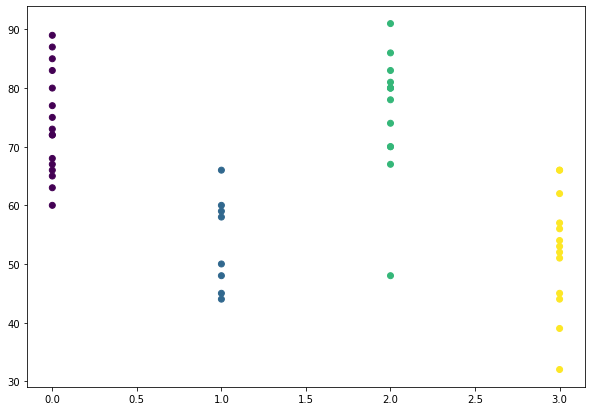

In [35]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df_k['ClusterID'],df_k['UrbanPop'], c=clusters_new.labels_)

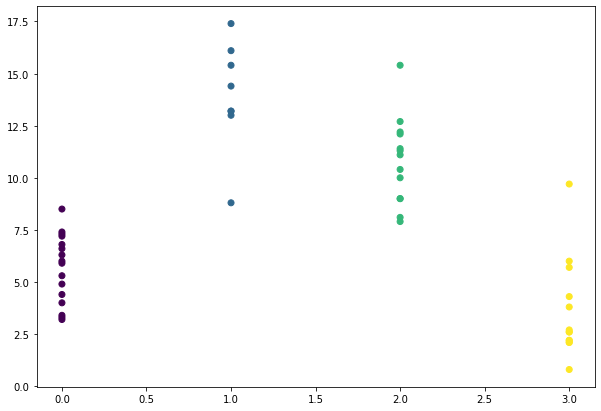

In [36]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df_k['ClusterID'],df_k['Murder'], c=clusters_new.labels_)

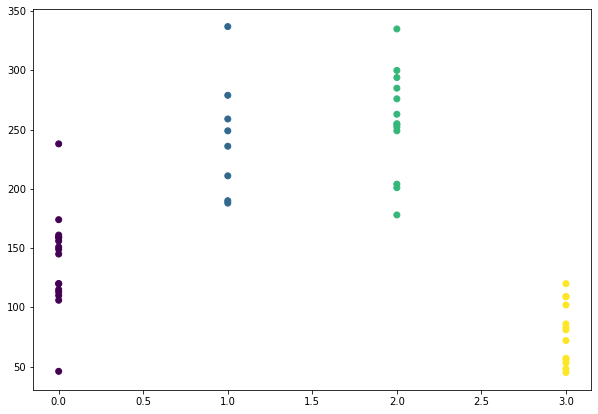

In [37]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df_k['ClusterID'],df_k['Assault'], c=clusters_new.labels_)

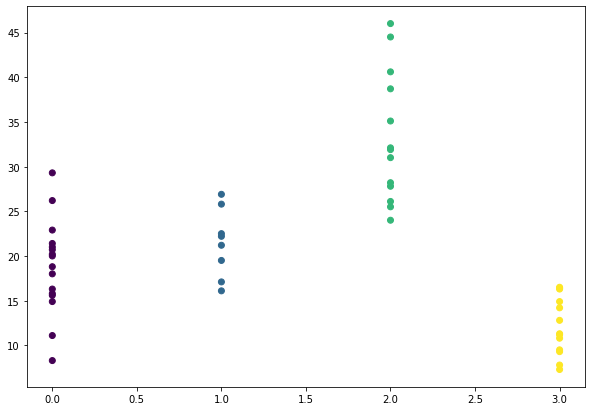

In [38]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df_k['ClusterID'],df_k['Rape'], c=clusters_new.labels_)

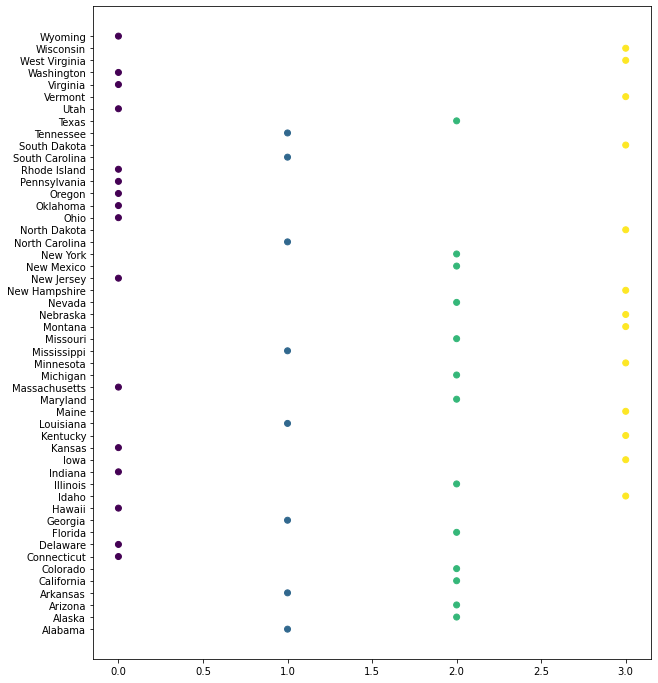

In [39]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(df_k['ClusterID'],df_k['state'], c=clusters_new.labels_)

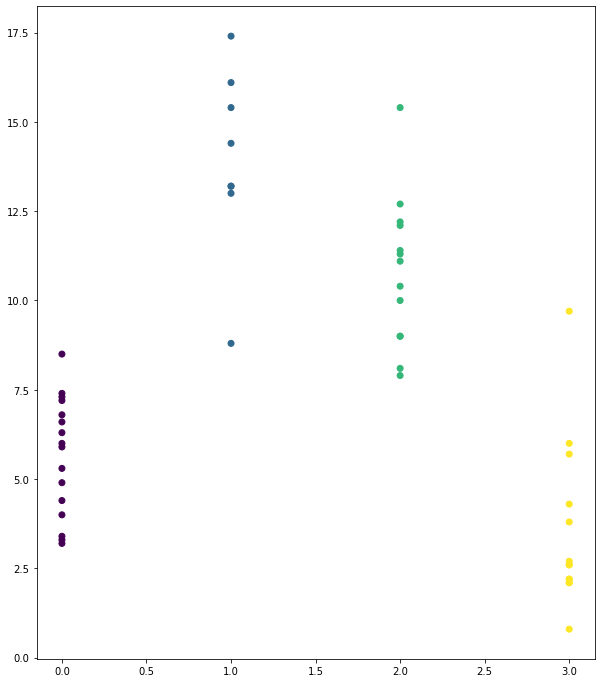

In [40]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(df_k['ClusterID'],df_k['Murder'], c=clusters_new.labels_)

## DBSCAN_Clustering

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
df_d=pd.read_csv("D:\\assignment\\clustering\\crime_data.csv")
df_d.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [43]:
df_d.rename(columns={'Unnamed: 0':'state'},inplace=True )
df_d.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [44]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [45]:
#drop the object data type
df_d.drop(['state'],axis=1,inplace=True)
df_d.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [46]:
array=df_d.values

In [47]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [48]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [49]:
#standrard values
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [50]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit_predict(X)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [51]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [52]:
cluster=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cluster

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [53]:
#adding the cluster value into the dataframe
clustered = pd.concat([df_d,cluster],axis=1)

In [54]:
clustered[clustered['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
10,5.3,46,83,20.2,-1
27,12.2,252,81,46.0,-1
32,13.0,337,45,16.1,-1


In [55]:
clustered[clustered['cluster']==0]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
9,17.4,211,60,25.8,0
17,15.4,249,66,22.2,0
23,16.1,259,44,17.1,0
39,14.4,279,48,22.5,0
41,13.2,188,59,26.9,0


In [56]:
clustered[clustered['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
12,10.4,249,83,24.0,2
31,11.1,254,86,26.1,2
42,12.7,201,80,25.5,2


In [57]:
clustered[clustered['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
6,3.3,110,77,11.1,1
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
20,4.4,149,85,16.3,1
22,2.7,72,66,14.9,1
24,9.0,178,70,28.2,1


In [58]:
clustered

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


## Visualisation

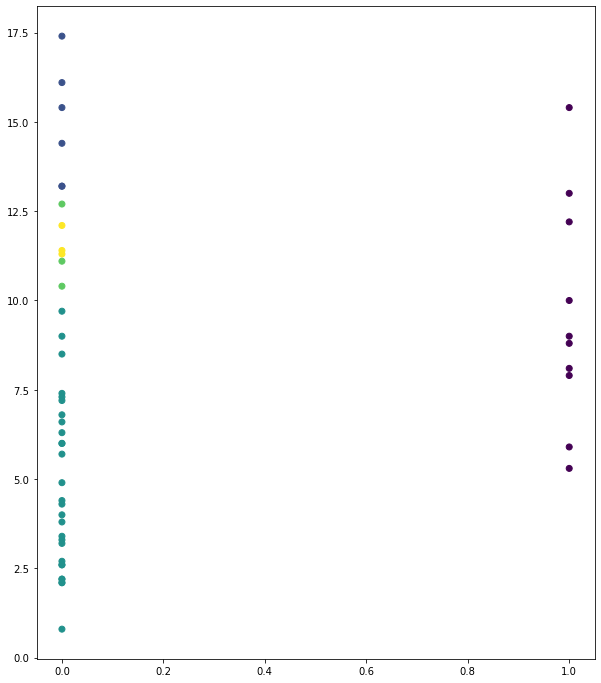

In [59]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==-1,df_d['Murder'], c=dbscan.labels_)

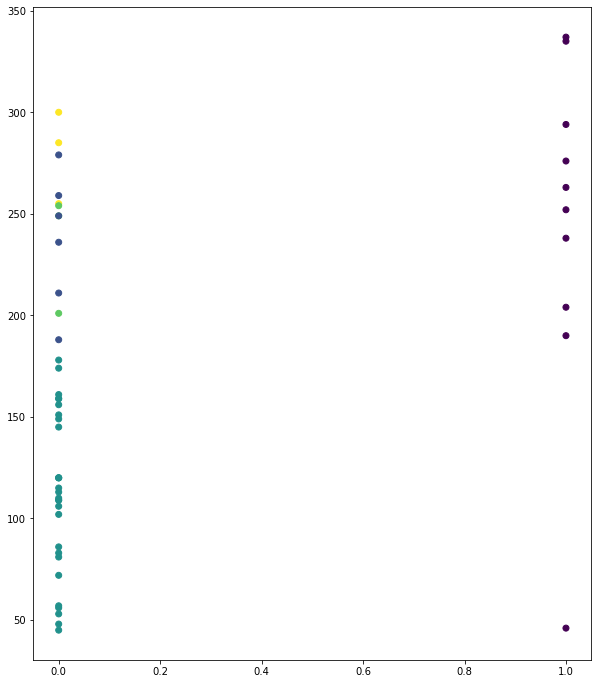

In [60]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==-1,df_d['Assault'], c=dbscan.labels_)

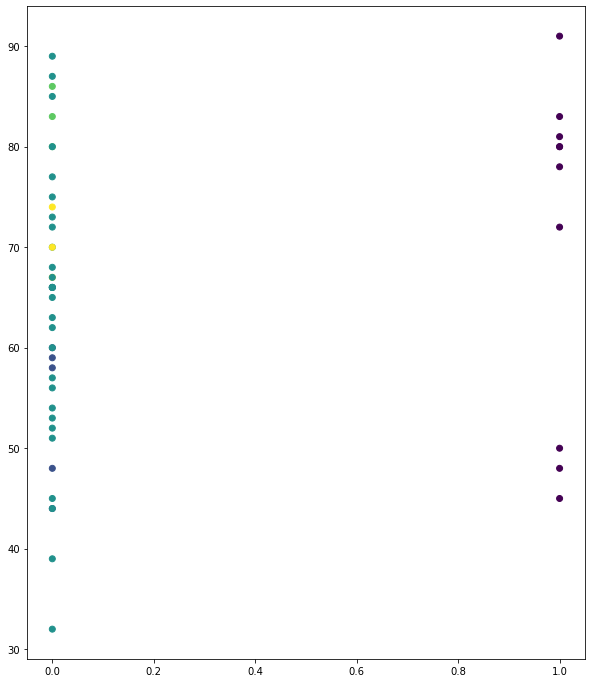

In [61]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==-1,df_d['UrbanPop'], c=dbscan.labels_)

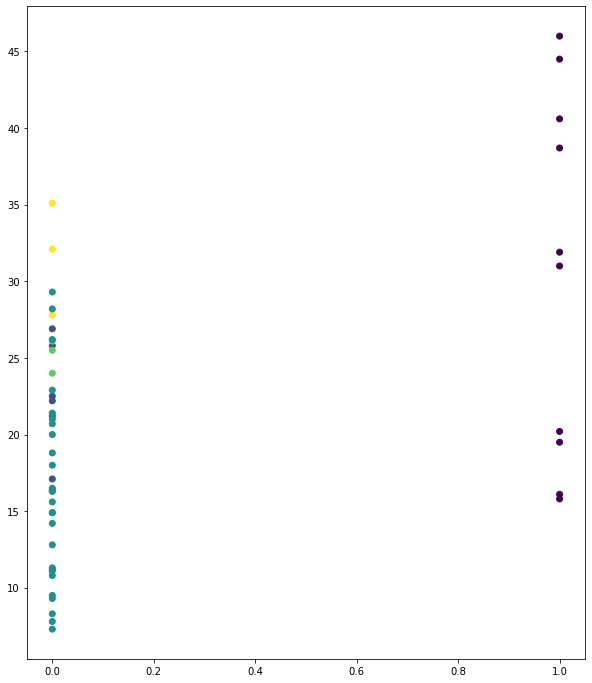

In [62]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==-1,df_d['Rape'], c=dbscan.labels_)

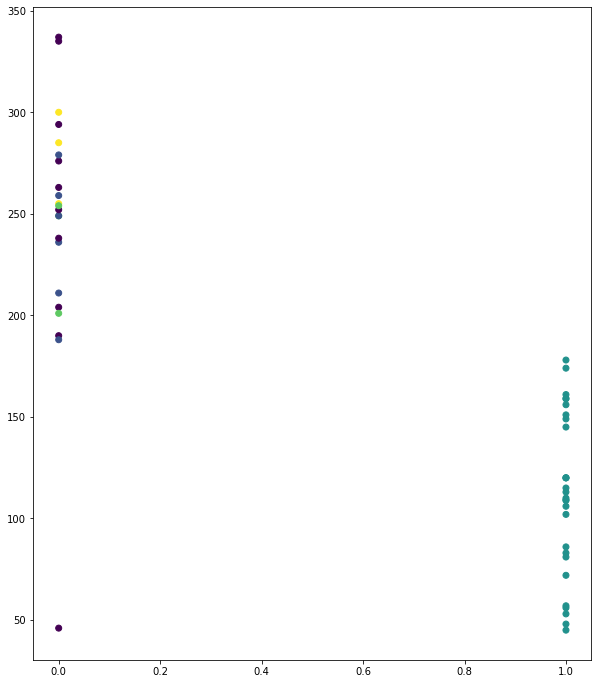

In [63]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==1,df_d['Assault'], c=dbscan.labels_)

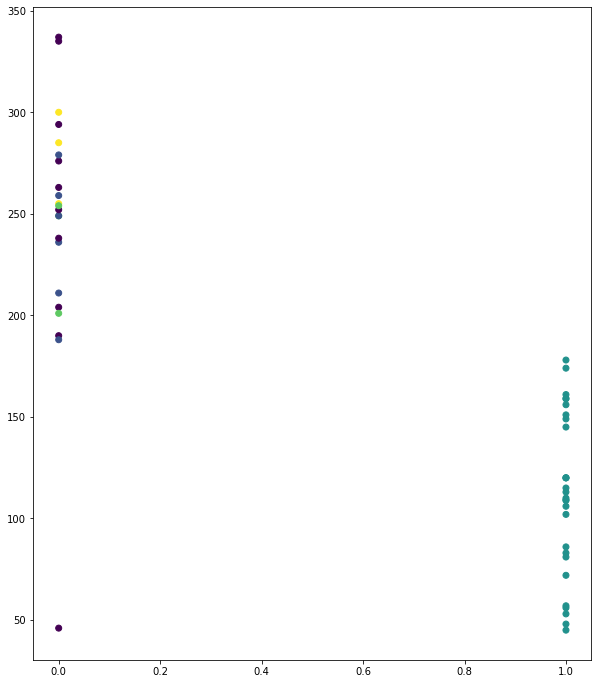

In [64]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==1,df_d['Assault'], c=dbscan.labels_)

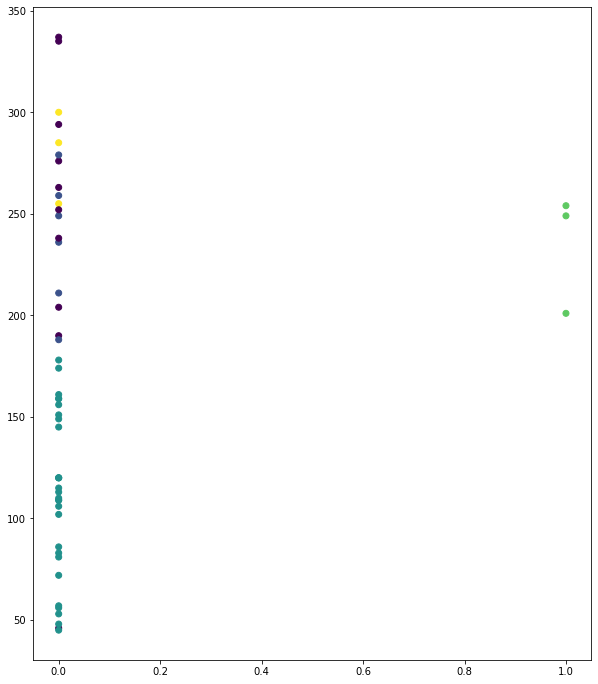

In [65]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==2,df_d['Assault'], c=dbscan.labels_)

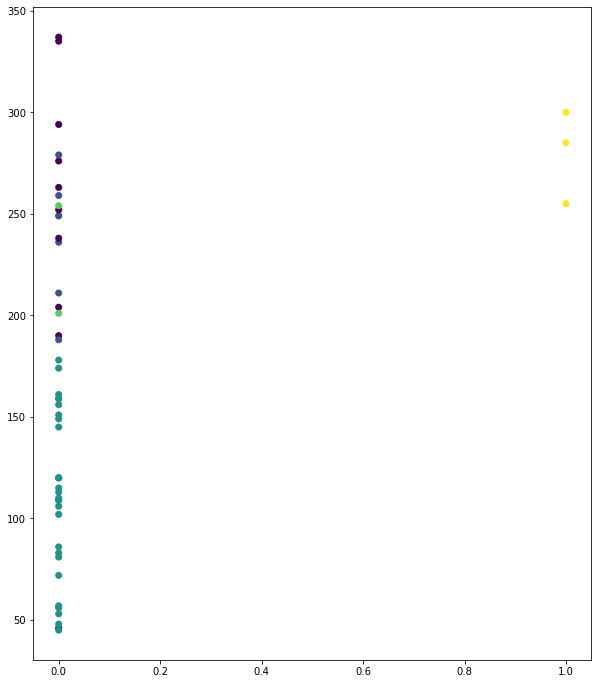

In [66]:
# Plot Clusters
plt.figure(figsize=(10, 12))  
plt.scatter(clustered['cluster']==3,df_d['Assault'], c=dbscan.labels_)

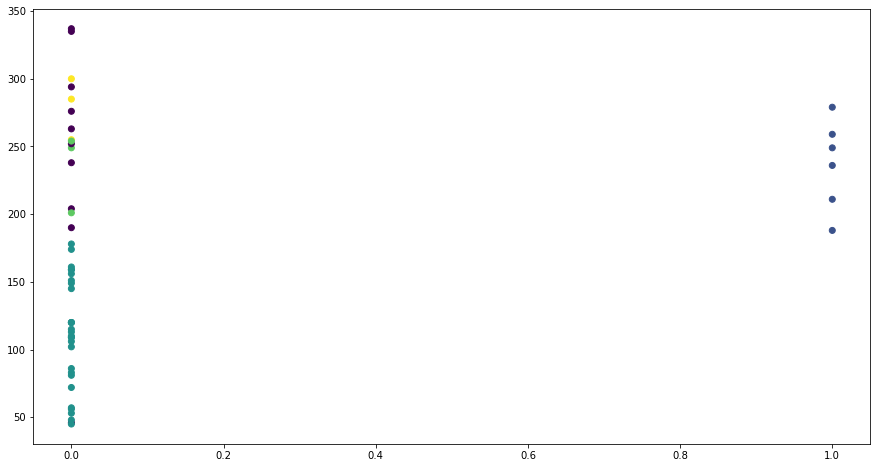

In [67]:
# Plot Clusters
plt.figure(figsize=(15,8))  
plt.scatter(clustered['cluster']==0,df_d['Assault'], c=dbscan.labels_)